In [1]:
import cbpro
import pandas as pd
from pathlib import Path
import time 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pytz

def ob():
    
    client = cbpro.PublicClient()

    # order_book = cbp.get_product_order_book('ETH-USD')

    order_book = cbpro.OrderBook(product_id='ETH-USD')
    order_book.start()

    data = client.get_product_order_book('ETH-USD', level=2)
    data

    # df = pd.DataFrame(data['bids'])
    # df
    bids = pd.DataFrame(data['bids'])
    asks = pd.DataFrame(data['asks'])
    # df = pd.DataFrame(data)

    df = pd.merge(bids, asks, left_index=True, right_index=True)
    df = df.rename({"0_x":"Bid Price","1_x":"Bid Size", "2_x":"Bid Amount",
                    "0_y":"Ask Price","1_y":"Ask Size", "2_y":"Ask Amount"}, axis='columns')

    df['Bid Price'] = pd.to_numeric(df['Bid Price'])
    df['Ask Price'] = pd.to_numeric(df['Ask Price'])
    df['Bid Size'] = pd.to_numeric(df['Bid Size'])
    df['Ask Size'] = pd.to_numeric(df['Ask Size'])
    df['Bid Amount'] = pd.to_numeric(df['Bid Amount'])
    df['Ask Amount'] = pd.to_numeric(df['Ask Amount'])
    
    df['Spread'] = df['Bid Price']-df['Ask Price']
    df['Diff Size'] = df['Bid Size']-df['Ask Size']
    return (df)

df = ob()

df.iloc[1]

df.to_csv(r"D:\Trading\Bot\Docs/ETHUSD Bids.csv",index=False)

In [2]:
# import cbpro
# import pandas as pd
# from pathlib import Path
# import time 
# import matplotlib.pyplot as plt
# import seaborn as sns
# import datetime as dt
# import pytz
# import requests

# client = cbpro.PublicClient()

# url = "https://api.exchange.coinbase.com/products/ETH-USD/book?level=2"

# headers = {"accept": "application/json"}

# response = requests.get(url, headers=headers)

# print(response.text)

In [3]:
import cbpro
import pandas as pd
from pathlib import Path
import time 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pytz

client = cbpro.PublicClient()
client.get_product_trades(product_id='ETH-USD')

<generator object PublicClient._send_paginated_message at 0x00000221242B1F20>

In [4]:
# pd.DataFrame(client.get_products())

In [5]:
get_trades = client.get_product_trades(product_id='ETH-USD')

In [6]:
# import sys
# import logging

# so = open("data.log", 'w', 10)
# sys.stdout.echo = so
# sys.stderr.echo = so

# get_ipython().log.handlers[0].stream = so
# get_ipython().log.setLevel(logging.INFO)

In [7]:
next(get_trades)

{'time': '2022-10-13T02:47:31.62322Z',
 'trade_id': 367866061,
 'price': '1285.72000000',
 'size': '0.59062000',
 'side': 'sell'}

In [8]:
all_trades = list(get_trades)

In [9]:
all_trades

[{'time': '2022-10-13T02:47:31.62322Z',
  'trade_id': 367866060,
  'price': '1285.70000000',
  'size': '0.98009233',
  'side': 'sell'},
 {'time': '2022-10-13T02:47:31.62322Z',
  'trade_id': 367866059,
  'price': '1285.69000000',
  'size': '1.39189456',
  'side': 'sell'},
 {'time': '2022-10-13T02:47:31.575835Z',
  'trade_id': 367866058,
  'price': '1285.60000000',
  'size': '0.92875680',
  'side': 'sell'},
 {'time': '2022-10-13T02:47:31.5344Z',
  'trade_id': 367866057,
  'price': '1285.54000000',
  'size': '0.00007000',
  'side': 'buy'},
 {'time': '2022-10-13T02:47:31.5344Z',
  'trade_id': 367866056,
  'price': '1285.55000000',
  'size': '0.01172260',
  'side': 'buy'},
 {'time': '2022-10-13T02:47:31.5344Z',
  'trade_id': 367866055,
  'price': '1285.55000000',
  'size': '0.00055229',
  'side': 'buy'},
 {'time': '2022-10-13T02:47:31.5344Z',
  'trade_id': 367866054,
  'price': '1285.55000000',
  'size': '0.00078565',
  'side': 'buy'},
 {'time': '2022-10-13T02:47:31.5344Z',
  'trade_id': 36

In [10]:
df_trades = pd.DataFrame(all_trades[:-1])
df_trades

,time,trade_id,price,size,side
0,2022-10-13T02:47:31.62322Z,367866060,1285.70000000,0.98009233,sell
1,2022-10-13T02:47:31.62322Z,367866059,1285.69000000,1.39189456,sell
2,2022-10-13T02:47:31.575835Z,367866058,1285.60000000,0.92875680,sell
3,2022-10-13T02:47:31.5344Z,367866057,1285.54000000,0.00007000,buy
4,2022-10-13T02:47:31.5344Z,367866056,1285.55000000,0.01172260,buy
...,...,...,...,...,...
184994,2022-10-12T16:10:19.13803Z,367681066,1297.50000000,0.00851881,buy
184995,2022-10-12T16:10:19.13803Z,367681065,1297.52000000,0.00000490,buy
184996,2022-10-12T16:10:19.13803Z,367681064,1297.54000000,0.00005394,buy
184997,2022-10-12T16:10:19.06636Z,367681063,1297.52000000,0.11290000,buy


In [11]:
df_trades['price'] = pd.to_numeric(df_trades['price'])
df_trades['size'] = pd.to_numeric(df_trades['size'])

In [12]:
df_trades['trade_dollar_size'] = df_trades['price'] * df_trades['size']
df_trades ['change_in_price'] = df_trades['price'].diff().abs()

In [13]:
df_trades[['price', 'size','trade_dollar_size','change_in_price']].describe()

,price,size,trade_dollar_size,change_in_price
count,184999.000000,1.849990e+05,184999.000000,184998.000000
mean,1295.820461,4.848032e-01,627.947641,0.030560
std,3.284274,1.305690e+00,1690.967930,0.049434
min,1281.930000,1.000000e-08,0.000013,0.000000
25%,1294.350000,4.862955e-03,6.303696,0.000000
50%,1296.250000,7.708401e-02,99.994223,0.010000
75%,1297.810000,3.809031e-01,493.514957,0.040000
max,1303.380000,4.943545e+01,64117.772593,1.700000


In [14]:
df_trades['time'] = pd.to_datetime(df_trades.time, format='%Y-%m-%d %H:%M:%S')

df_trades['time'] = df_trades['time'].dt.strftime("%Y-%m-%d %H:%M:%S")

df_trades.head()

,time,trade_id,price,size,side,trade_dollar_size,change_in_price
0,2022-10-13 02:47:31,367866060,1285.70,0.980092,sell,1260.104709,NaN
1,2022-10-13 02:47:31,367866059,1285.69,1.391895,sell,1789.544917,0.01
2,2022-10-13 02:47:31,367866058,1285.60,0.928757,sell,1194.009742,0.09
3,2022-10-13 02:47:31,367866057,1285.54,0.000070,buy,0.089988,0.06
4,2022-10-13 02:47:31,367866056,1285.55,0.011723,buy,15.069988,0.01


In [15]:
df_trades.drop(['trade_id'], axis=1)

,time,price,size,side,trade_dollar_size,change_in_price
0,2022-10-13 02:47:31,1285.70,0.980092,sell,1260.104709,NaN
1,2022-10-13 02:47:31,1285.69,1.391895,sell,1789.544917,0.01
2,2022-10-13 02:47:31,1285.60,0.928757,sell,1194.009742,0.09
3,2022-10-13 02:47:31,1285.54,0.000070,buy,0.089988,0.06
4,2022-10-13 02:47:31,1285.55,0.011723,buy,15.069988,0.01
...,...,...,...,...,...,...
184994,2022-10-12 16:10:19,1297.50,0.008519,buy,11.053156,0.04
184995,2022-10-12 16:10:19,1297.52,0.000005,buy,0.006358,0.02
184996,2022-10-12 16:10:19,1297.54,0.000054,buy,0.069989,0.02
184997,2022-10-12 16:10:19,1297.52,0.112900,buy,146.490008,0.02


In [20]:
df_trades.to_csv(r"D:\Trading\Bot\Docs/ETHUSD Trades.csv",index=False)

In [17]:
# fig, ax = plt.subplots()
# fig = plt.figure(figsize = (60, 40))
# ax.bar(df_trades['trade_dollar_size'], df_trades['price'])

# plt.show()

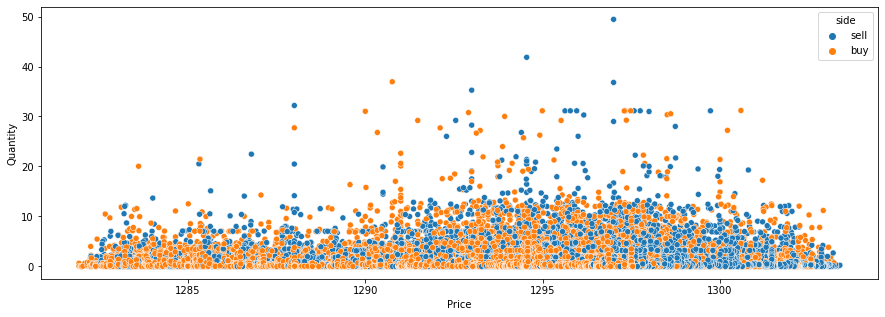

In [18]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.scatterplot(x=df_trades["price"], y=df_trades["size"], hue="side", data=df_trades, ax=ax)

ax.set_xlabel("Price")
ax.set_ylabel("Quantity")

plt.show()